<a href="https://colab.research.google.com/github/reinaldoasf/deeplearning/blob/master/deepLearning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Questao 6**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, make_scorer
import seaborn as sns
import matplotlib.ticker as ticker

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
teta = np.linspace(0,20,num=1000);
print(teta);


[ 0.          0.02002002  0.04004004  0.06006006  0.08008008  0.1001001
  0.12012012  0.14014014  0.16016016  0.18018018  0.2002002   0.22022022
  0.24024024  0.26026026  0.28028028  0.3003003   0.32032032  0.34034034
  0.36036036  0.38038038  0.4004004   0.42042042  0.44044044  0.46046046
  0.48048048  0.5005005   0.52052052  0.54054054  0.56056056  0.58058058
  0.6006006   0.62062062  0.64064064  0.66066066  0.68068068  0.7007007
  0.72072072  0.74074074  0.76076076  0.78078078  0.8008008   0.82082082
  0.84084084  0.86086086  0.88088088  0.9009009   0.92092092  0.94094094
  0.96096096  0.98098098  1.001001    1.02102102  1.04104104  1.06106106
  1.08108108  1.1011011   1.12112112  1.14114114  1.16116116  1.18118118
  1.2012012   1.22122122  1.24124124  1.26126126  1.28128128  1.3013013
  1.32132132  1.34134134  1.36136136  1.38138138  1.4014014   1.42142142
  1.44144144  1.46146146  1.48148148  1.5015015   1.52152152  1.54154154
  1.56156156  1.58158158  1.6016016   1.62162162  1.64

 **Training and Test Data**

,X,Y,classe
104,-0.254690,0.453954,0.0
1190,-1.380861,-1.076593,1.0
381,0.427960,1.858264,0.0
201,-0.639091,-0.776924,0.0
1367,1.279491,2.305604,1.0
...,...,...,...
1993,2.968887,4.947551,1.0
1440,-2.450439,1.734522,1.0
401,-0.347551,1.976685,0.0
1180,-1.522575,-0.758175,1.0


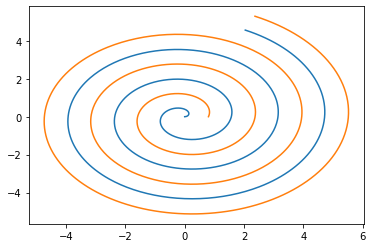

In [ ]:
x_esp1 = (teta/4)*np.cos(teta)
y_esp1 = (teta/4)*np.sin(teta)
x_esp2 = (teta/4+.8)*np.cos(teta)
y_esp2 = (teta/4+.8)*np.sin(teta)

plt.plot(x_esp1,y_esp1)
plt.plot(x_esp2,y_esp2)
classe = np.append(np.zeros(1000),np.ones(1000))

#building the dataset:
entry = np.array([np.append(x_esp1,x_esp2),np.append(y_esp1,y_esp2)])
data = pd.DataFrame({'X':entry[0],'Y':entry[1],'classe':classe})
data = data.reindex(np.random.permutation(data.index))

#Stablishing input
x_train = data[['X','Y']].to_numpy()[:1700]
x_test = data[['X','Y']].to_numpy()[1700:2000]

#Stablishing output
y_train = data['classe'].to_numpy()[:1700]
y_test = data['classe'].to_numpy()[1700:2000]
data
#x_train = data[:, ['X','Y']]


 **Buiding model**

In [ ]:
model = Sequential()
model.add(Dense(30,input_shape=(2,),activation='relu')) #inputs in x,y coordinates
#model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid')) #output class
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                90        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile( optimizer= 'adam', loss = 'binary_crossentropy' ,metrics=['accuracy'])

print("Training started..., this can take a while:")

# Fit your model on your data for 20 epochs

model.fit(x_train,y_train, epochs = 1000);

# Evaluate your model 
print("Final lost value:",model.evaluate(x_test, y_test))

Training started..., this can take a while:
Epoch 1/1000
1700/1700 [==============================] - 0s 203us/step - loss: 0.7044 - accuracy: 0.4976
Epoch 2/1000
1700/1700 [==============================] - 0s 36us/step - loss: 0.6890 - accuracy: 0.5418
Epoch 3/1000
1700/1700 [==============================] - 0s 36us/step - loss: 0.6827 - accuracy: 0.5800
Epoch 4/1000
1700/1700 [==============================] - 0s 39us/step - loss: 0.6783 - accuracy: 0.5600
Epoch 5/1000
1700/1700 [==============================] - 0s 40us/step - loss: 0.6751 - accuracy: 0.5212
Epoch 6/1000
1700/1700 [==============================] - 0s 37us/step - loss: 0.6731 - accuracy: 0.5418
Epoch 7/1000
1700/1700 [==============================] - 0s 37us/step - loss: 0.6698 - accuracy: 0.5500
Epoch 8/1000
1700/1700 [==============================] - 0s 35us/step - loss: 0.6681 - accuracy: 0.5494
Epoch 9/1000
1700/1700 [==============================] - 0s 37us/step - loss: 0.6665 - accuracy: 0.5624
Epoch 10/1

In [ ]:
# Evaluate your model 
print("Final lost value:",model.evaluate(x_test, y_test))

300/300 [==============================] - 0s 25us/step
Final lost value: [0.6553312810262044, 0.5633333325386047]


**Matriz de confusao**

A acurácia do modelo do item a é de 0.5633333333333334
              precision    recall  f1-score   support

         0.0     0.5946    0.4342    0.5019       152
         1.0     0.5450    0.6959    0.6113       148

    accuracy                         0.5633       300
   macro avg     0.5698    0.5651    0.5566       300
weighted avg     0.5701    0.5633    0.5559       300

None


Text(0.5, 1.0, 'Matriz de confusão modelo 1')

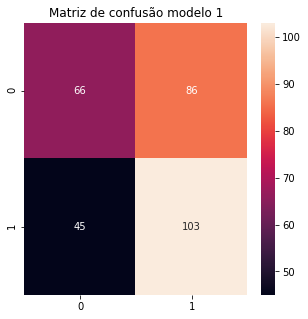

In [ ]:
predict = model.predict_classes(x_test)

conf_mat = confusion_matrix(y_test, predict)
plt.figure(figsize=(5, 5))
ax = sns.heatmap(conf_mat, annot=True, fmt=".0f")
print(f"A acurácia do modelo do item a é de {accuracy_score(y_test, predict)}")
print(print(classification_report(y_test, predict, digits=4)))
ax.set_title("Matriz de confusão modelo 1")


**Second Model**

In [ ]:
model2 = Sequential()
model2.add(Dense(30,input_shape=(2,),activation='relu')) #inputs in x,y coordinates
model2.add((Dense(20,activation='relu')))
#model2.add((Dense(20,activation='relu')))
#model2.add(Dropout(0.2))
model2.add(Dense(1,activation='sigmoid')  ) #output class
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                90        
_________________________________________________________________
dense_4 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 731
Trainable params: 731
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile( optimizer= 'adam', loss = 'binary_crossentropy',metrics=['accuracy'])

print("Training started..., this can take a while:")

# Fit your model on your data for 20 epochs
#x_train,y_train
model2.fit(x_train,y_train, epochs = 1000);


Training started..., this can take a while:
Epoch 1/1000
1700/1700 [==============================] - 0s 100us/step - loss: 0.7023 - accuracy: 0.5035
Epoch 2/1000
1700/1700 [==============================] - 0s 38us/step - loss: 0.6843 - accuracy: 0.5776
Epoch 3/1000
1700/1700 [==============================] - 0s 38us/step - loss: 0.6787 - accuracy: 0.6076
Epoch 4/1000
1700/1700 [==============================] - 0s 37us/step - loss: 0.6737 - accuracy: 0.5459
Epoch 5/1000
1700/1700 [==============================] - 0s 39us/step - loss: 0.6695 - accuracy: 0.5447
Epoch 6/1000
1700/1700 [==============================] - 0s 37us/step - loss: 0.6675 - accuracy: 0.5553
Epoch 7/1000
1700/1700 [==============================] - 0s 48us/step - loss: 0.6660 - accuracy: 0.5353
Epoch 8/1000
1700/1700 [==============================] - 0s 43us/step - loss: 0.6605 - accuracy: 0.5853
Epoch 9/1000
1700/1700 [==============================] - 0s 38us/step - loss: 0.6595 - accuracy: 0.5782
Epoch 10/1

In [ ]:
# Evaluate your model 
print("Final lost value:",model2.evaluate(x_test, y_test))

300/300 [==============================] - 0s 87us/step
Final lost value: [4.953200205666993e-07, 1.0]


**Matriz de confusão**

A acurácia do modelo do item a é de 1.0
              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000       152
         1.0     1.0000    1.0000    1.0000       148

    accuracy                         1.0000       300
   macro avg     1.0000    1.0000    1.0000       300
weighted avg     1.0000    1.0000    1.0000       300

None


Text(0.5, 1.0, 'Matriz de confusão modelo 2')

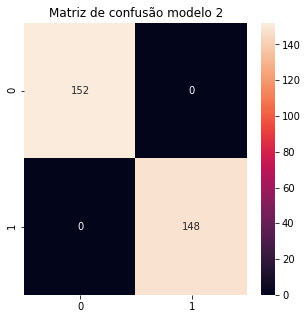

In [ ]:
predict = model2.predict_classes(x_test)
#predict = np.around(predict)

conf_mat = confusion_matrix(y_test, predict)
plt.figure(figsize=(5, 5))
ax = sns.heatmap(conf_mat, annot=True, fmt=".0f")
print(f"A acurácia do modelo do item a é de {accuracy_score(y_test, predict)}")
print(print(classification_report(y_test, predict, digits=4)))
ax.set_title("Matriz de confusão modelo 2")

**Plot figures**

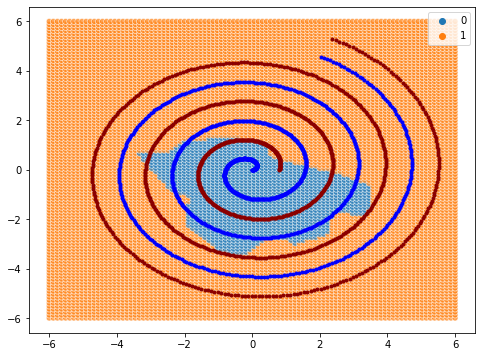

In [ ]:
x_grid = np.linspace(-6,6,num=100);
y_grid = np.linspace(-6,6,num=100);


xx, yy = np.meshgrid(x_grid, y_grid)
xx_flat = xx.flatten()
yy_flat = yy.flatten()
inputt = np.column_stack((xx_flat, yy_flat))

resultado = model.predict_classes(inputt)
plt.figure(figsize=(8, 6))
sns.scatterplot(xx_flat, yy_flat, hue=resultado.flatten(), alpha=0.7)
plt.plot(x_esp1, y_esp1, color="blue", marker=".", linestyle="None")
plt.plot(x_esp2, y_esp2, color="darkred", marker=".", linestyle="None")
plt.show()

**to model 2**

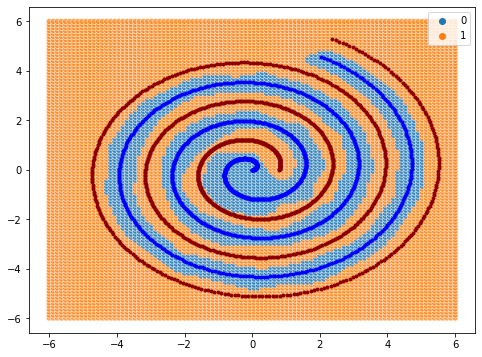

In [ ]:
x_grid = np.linspace(-6,6,num=100);
y_grid = np.linspace(-6,6,num=100);


xx, yy = np.meshgrid(x_grid, y_grid)
xx_flat = xx.flatten()
yy_flat = yy.flatten()
inputt = np.column_stack((xx_flat, yy_flat))

resultado = model2.predict_classes(inputt)
plt.figure(figsize=(8, 6))
sns.scatterplot(xx_flat, yy_flat, hue=resultado.flatten(), alpha=0.7)
plt.plot(x_esp1, y_esp1, color="blue", marker=".", linestyle="None")
plt.plot(x_esp2, y_esp2, color="darkred", marker=".", linestyle="None")
plt.show()
